In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/peter/Desktop/DOI - Mai/data/HR_comma_sep.csv', index_col=None)

In [3]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [5]:
df.shape
# The dataset contains 10 columns and 14999 observations

(14999, 10)

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [8]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [9]:
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

# Looks like about 76% of employees stayed and 24% of employees left. 

0    0.761917
1    0.238083
Name: turnover, dtype: float64

satisfaction  evaluation  projectCount  \
satisfaction             1.000000    0.105021     -0.142970   
evaluation               0.105021    1.000000      0.349333   
projectCount            -0.142970    0.349333      1.000000   
averageMonthlyHours     -0.020048    0.339742      0.417211   
yearsAtCompany          -0.100866    0.131591      0.196786   
workAccident             0.058697   -0.007104     -0.004741   
turnover                -0.388375    0.006567      0.023787   
promotion                0.025605   -0.008684     -0.006064   

                     averageMonthlyHours  yearsAtCompany  workAccident  \
satisfaction                   -0.020048       -0.100866      0.058697   
evaluation                      0.339742        0.131591     -0.007104   
projectCount                    0.417211        0.196786     -0.004741   
averageMonthlyHours             1.000000        0.127755     -0.010143   
yearsAtCompany                  0.127755        1.000000      0.002120   
workAccident                   -0.010143        0.002120      1.000000   
turnover                        0.071287        0.144822     -0.154622   
promotion                      -0.003544        0.067433      0.039245   

                     turnover  promotion  
satisfaction        -0.388375   0.025605  
evaluation           0.006567  -0.008684  
projectCount         0.023787  -0.006064  
averageMonthlyHours  0.071287  -0.003544  
yearsAtCompany       0.144822   0.067433  
workAccident        -0.154622   0.039245  
turnover             1.000000  -0.061788  
promotion           -0.061788   1.000000

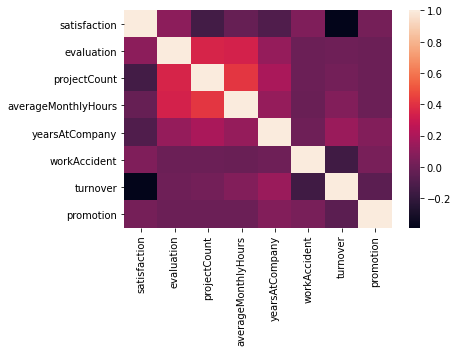

In [10]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [11]:
emp_population = df['satisfaction'][df['turnover'] == 0].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )


The mean satisfaction for the employee population with no turnover is: 0.666809590479524
The mean satisfaction for employees that had a turnover is: 0.4400980117614114


In [12]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover satisfaction mean

Ttest_1sampResult(statistic=-51.33034867547431, pvalue=0.0)

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

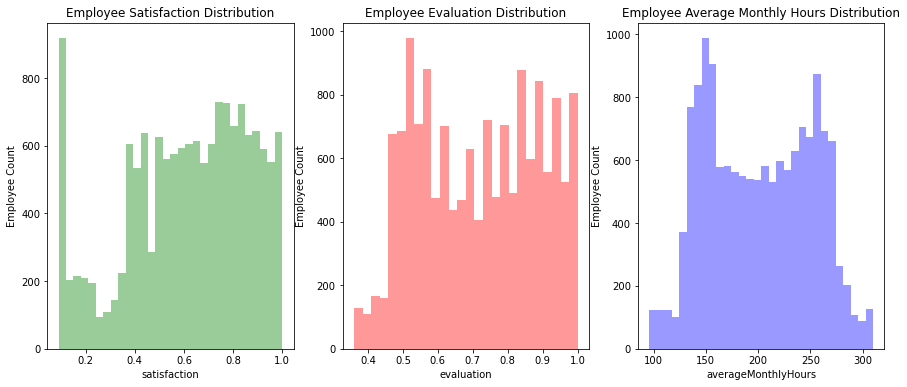

In [13]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

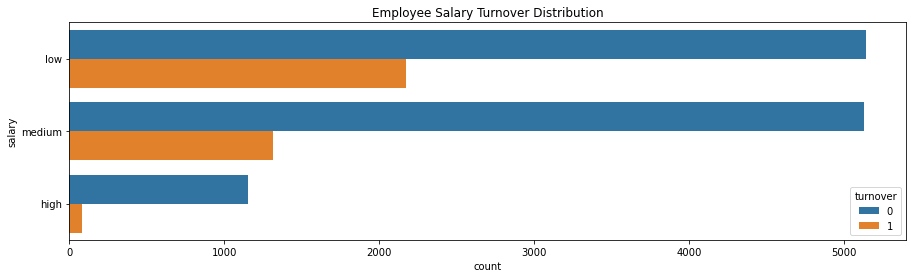

In [14]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

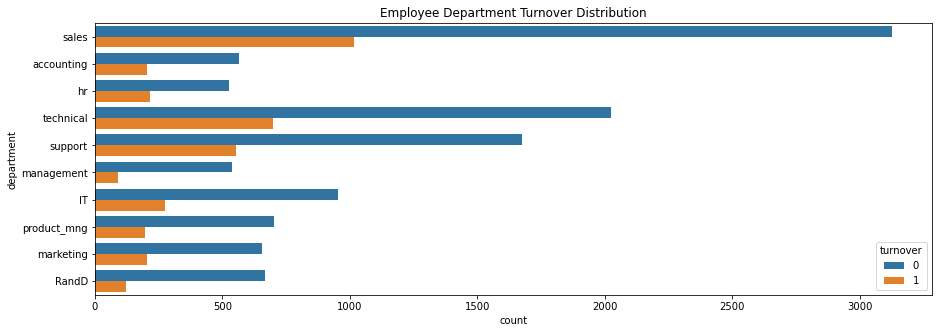

In [15]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

[Text(0, 0.5, 'Percent')]

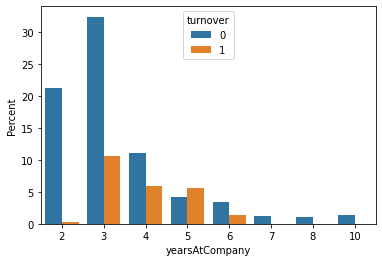

In [16]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Principal Component Analysis

In [60]:
df.head()

satisfaction  evaluation  projectCount  averageMonthlyHours  \
0          0.38        0.53             2                  157   
1          0.80        0.86             5                  262   
2          0.11        0.88             7                  272   
3          0.72        0.87             5                  223   
4          0.37        0.52             2                  159   

   yearsAtCompany  workAccident  turnover  promotion department  salary  
0               3             0         1          0      sales     low  
1               6             0         1          0      sales  medium  
2               4             0         1          0      sales  medium  
3               5             0         1          0      sales     low  
4               3             0         1          0      sales     low

In [61]:
df_drop=df.drop(labels=['department','salary'],axis=1)
df_drop.head()

satisfaction  evaluation  projectCount  averageMonthlyHours  \
0          0.38        0.53             2                  157   
1          0.80        0.86             5                  262   
2          0.11        0.88             7                  272   
3          0.72        0.87             5                  223   
4          0.37        0.52             2                  159   

   yearsAtCompany  workAccident  turnover  promotion  
0               3             0         1          0  
1               6             0         1          0  
2               4             0         1          0  
3               5             0         1          0  
4               3             0         1          0

In [62]:
cols = df_drop.columns.tolist()
cols

['satisfaction',
 'evaluation',
 'projectCount',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'turnover',
 'promotion']

In [63]:
cols.insert(0, cols.pop(cols.index('turnover')))

In [64]:
cols

['turnover',
 'satisfaction',
 'evaluation',
 'projectCount',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'promotion']

In [65]:
#df_drop = df_drop.reindex(columns=cols)
# By using df_drop.reindex(columns=cols) I am converting list to columns again

In [66]:
# Now I am separating features of my dataframe from the labels.
X = df_drop.iloc[:,1:8].values
y = df_drop.iloc[:,0].values
X

array([[  0.53,   2.  , 157.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.86,   5.  , 262.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.88,   7.  , 272.  , ...,   0.  ,   1.  ,   0.  ],
       ...,
       [  0.53,   2.  , 143.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.96,   6.  , 280.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.52,   2.  , 158.  , ...,   0.  ,   1.  ,   0.  ]])

In [67]:
y

array([0.38, 0.8 , 0.11, ..., 0.37, 0.11, 0.37])

In [68]:
np.shape(X)

# Thus X is now a matrix with 14999 rows and 7 columns

(14999, 7)

Data Standardisation

In [69]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Computing Eigenvectors and Eigenvalues

In [70]:
# Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_matrix = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' % cov_matrix)

Covariance matrix 
[[ 1.00006668  0.34935588  0.33976445  0.1315995  -0.00710476  0.00656756
  -0.00868435]
 [ 0.34935588  1.00006668  0.41723845  0.19679901 -0.00474086  0.02378877
  -0.00606436]
 [ 0.33976445  0.41723845  1.00006668  0.12776343 -0.01014356  0.07129193
  -0.00354465]
 [ 0.1315995   0.19679901  0.12776343  1.00006668  0.00212056  0.14483183
   0.06743742]
 [-0.00710476 -0.00474086 -0.01014356  0.00212056  1.00006668 -0.15463194
   0.03924805]
 [ 0.00656756  0.02378877  0.07129193  0.14483183 -0.15463194  1.00006668
  -0.06179223]
 [-0.00868435 -0.00606436 -0.00354465  0.06743742  0.03924805 -0.06179223
   1.00006668]]


In [72]:
# Eigen decomposition of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)

Eigenvectors 
[[ 0.50989801  0.13620434 -0.16228589 -0.00841522 -0.82288203  0.12840433
  -0.03771418]
 [ 0.565052    0.1067006  -0.08107955  0.71472262  0.38457839  0.03671742
  -0.05177067]
 [ 0.54862799  0.06563536 -0.140058   -0.6509886   0.38702913  0.10110378
   0.30213143]
 [ 0.31908163 -0.17222592  0.56958992 -0.19090421  0.01809938 -0.42820641
  -0.56917461]
 [-0.03698939  0.61544776  0.09242764  0.04419494 -0.06310716 -0.67915111
   0.37964593]
 [ 0.12860254 -0.69063536  0.19417634  0.15543461 -0.14053295 -0.24578919
   0.60370355]
 [ 0.00277133  0.2834439   0.75946899  0.05250788 -0.03336856  0.51664581
   0.2684498 ]]

Eigenvalues 
[1.83725929 1.18759578 1.04277835 0.56779059 0.67432069 0.91869413
 0.7720279 ]


Selecting Principal Components

In [73]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
#eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.8372592941709185
1.1875957764934435
1.04277834834622
0.567790589635523
0.6743206897650509
0.9186941275206664
0.7720279029653645


In [74]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in eig_vals] #sorted(eig_vals, reverse=True)]

In [75]:
x_pos = [i for i, _ in enumerate(cols[1:])]

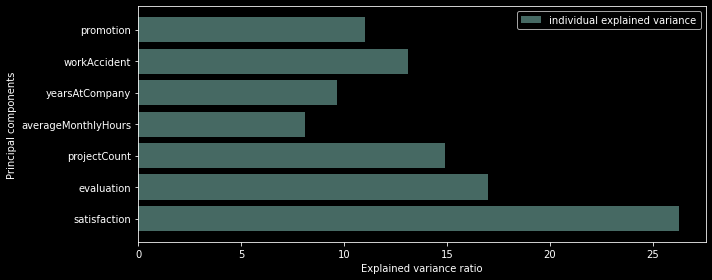

In [76]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 4))

    plt.barh(x_pos, var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.xlabel('Explained variance ratio')
    plt.ylabel('Principal components')
    plt.yticks(x_pos, cols[1:])
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that maximum variance (somewhere around 26%) can be explained by the satisfaction_level component alone. The promotion_5years, work_accident, years_with_company, and avg_monthly_hrs components share each about12-15%. The number_projects and last_evaluation components share the least information, but these cannot be ignored--since together they contribute almost 17% of the data.

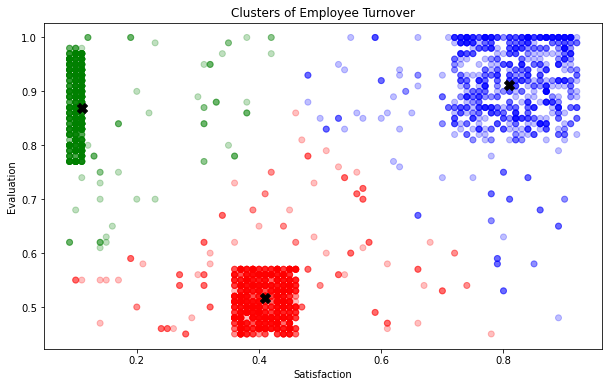

In [17]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

# Deep Learning Model to Predict Employee Retension

1/ Data Pre-processing

In [21]:
df.rename(columns={'sales': 'department'}, inplace=True)

In [22]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [23]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [24]:
# convert the categorical columns to numbers by converting them to dummy variables
df_final = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)

df_final

satisfaction  evaluation  projectCount  averageMonthlyHours  \
0              0.38        0.53             2                  157   
1              0.80        0.86             5                  262   
2              0.11        0.88             7                  272   
3              0.72        0.87             5                  223   
4              0.37        0.52             2                  159   
...             ...         ...           ...                  ...   
14994          0.40        0.57             2                  151   
14995          0.37        0.48             2                  160   
14996          0.37        0.53             2                  143   
14997          0.11        0.96             6                  280   
14998          0.37        0.52             2                  158   

       yearsAtCompany  workAccident  turnover  promotion  department_RandD  \
0                   3             0         1          0                 0   
1                   6             0         1          0                 0   
2                   4             0         1          0                 0   
3                   5             0         1          0                 0   
4                   3             0         1          0                 0   
...               ...           ...       ...        ...               ...   
14994               3             0         1          0                 0   
14995               3             0         1          0                 0   
14996               3             0         1          0                 0   
14997               4             0         1          0                 0   
14998               3             0         1          0                 0   

       department_accounting  department_hr  department_management  \
0                          0              0                      0   
1                          0              0                      0   
2                          0              0                      0   
3                          0              0                      0   
4                          0              0                      0   
...                      ...            ...                    ...   
14994                      0              0                      0   
14995                      0              0                      0   
14996                      0              0                      0   
14997                      0              0                      0   
14998                      0              0                      0   

       department_marketing  department_product_mng  department_sales  \
0                         0                       0                 1   
1                         0                       0                 1   
2                         0                       0                 1   
3                         0                       0                 1   
4                         0                       0                 1   
...                     ...                     ...               ...   
14994                     0                       0                 0   
14995                     0                       0                 0   
14996                     0                       0                 0   
14997                     0                       0                 0   
14998                     0                       0                 0   

       department_support  department_technical  salary_low  salary_medium  
0                       0                     0           1              0  
1                       0                     0           0              1  
2                       0                     0           0              1  
3                       0                     0           1              0  
4                       0                     0           1              0  
...                   ...                   ...  

2/ Separating Training and Testing Datasets

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
# I will predict left column

# input features
X = df_final.drop(['turnover'], axis=1).values

# output
y = df_final['turnover'].values

In [28]:
X

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [29]:
# Spliting data into training and testing (70% training and 30% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
X_train

array([[0.14, 0.66, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.45, 0.54, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.66, 0.59, 3.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.99, 0.7 , 2.  , ..., 0.  , 0.  , 1.  ],
       [0.22, 0.7 , 4.  , ..., 0.  , 1.  , 0.  ],
       [0.58, 0.61, 4.  , ..., 0.  , 0.  , 1.  ]])

3/ Transforming the Data

In [31]:
# To scale the training set and the test set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

4/ Building the Artificial Neural Network

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [33]:
# Using TensorFlow backend.

In [34]:
# Sequential to initialize a linear stack of layers
# Since this is a classification problem, we'll create a classifier variable
classifier = Sequential()

In [35]:
# adding layers to your network
classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim = 18))

In [36]:
classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

In [37]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [38]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 1)

1050/1050 [==============================] - 0s 444us/step - loss: 0.4179 - accuracy: 0.8065


5/ Running Predictions on the Test Set

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
y_pred = (y_pred > 0.5)

6/ Checking the Confusion Matrix

In [ ]:
# To evaluate how well the model performed on the predictions, I will next use a confusion matrix.

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3279,  123],
       [ 668,  430]], dtype=int64)

7/ Making a Single Prediction

In [42]:
new_pred = classifier.predict(sc.transform(np.array([[0.26,0.7 ,3., 238., 6., 0.,0.,0.,0., 0.,0.,0.,0.,0.,1.,0., 0.,1.]])))

In [43]:
new_pred = (new_pred > 0.6)

In [44]:
new_pred

array([[False]])

8/ Improving the Model Accuracy

In [45]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [46]:
def make_classifier():
    classifier = Sequential()
    classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

In [47]:
classifier = KerasClassifier(build_fn = make_classifier, batch_size = 10, nb_epoch = 1)

In [48]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

In [49]:
mean = accuracies.mean()
mean

0.8395080149173737

In [50]:
variance = accuracies.var()
variance

0.0015935010517552331

9/ Adding Dropout Regularization to Fight Over-Fitting

In [51]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim = 18))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

10/ Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

def make_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim = 18))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier

In [53]:
classifier = KerasClassifier(build_fn = make_classifier)

In [54]:
params = {
    'batch_size':[20,35],
    'epochs':[2,3],
    'optimizer':['adam','rmsprop']
}

In [55]:
grid_search = GridSearchCV(estimator = classifier, param_grid = params, scoring = "accuracy", cv = 2)

In [56]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/2
263/263 [==============================] - 0s 447us/step - loss: 0.5863 - accuracy: 0.7643
Epoch 2/2
263/263 [==============================] - 0s 436us/step - loss: 0.3919 - accuracy: 0.8253
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Epoch 1/2
263/263 [==============================] - 0s 434us/step - loss: 0.5779 - accuracy: 0.7621
Epoch 2/2
263/263 [==============================] - 0s 480us/step - loss: 0.4148 - accuracy: 0.7775
Epoch 1/2
263/263 [==============================] - 0s 425us/step - loss: 0.6077 - accuracy: 0.7651
Epoch 2/2
263/263 [==============================] - 0s 417us/step - loss: 0.4341 - accuracy: 0.8141
Epoch 1/2
263/263 [==============================] - 0s 417u

In [57]:
best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [58]:
best_param

{'batch_size': 20, 'epochs': 3, 'optimizer': 'rmsprop'}

In [59]:
best_accuracy

0.8669397164085677